---

<h1>TRABALHO FINAL DE MEAD - TURMA 2019.2</h1>
<h4>Grupo: Manoela Lacombe, Marcelo Bittencourt, Ivan Madeira de Oliveira</h4>

---

<h1>Questão 1 (1 pontos)</h1>

<h4>Maria irá se casar amanhã, em uma cerimônia ao ar livre no deserto. Nos últimos anos,
    choveu apenas <strong><em>5 dias por ano no local</em></strong> da cerimônia. Infelizmente, <strong><em>a previsão do tempo é de chuva</em></strong> para o dia do casamento. Sabe-se que, <strong><em>quando de fato choveu</em></strong>, a previsão do tempo <strong><em>previu chuva em 90% dos casos</em></strong> e que <strong><em>quando não choveu</em></strong>, a previsão do tempo <strong><em>previu chuva em 10% dos casos</em></strong>.</h4>
   

<h4>Qual é a probabilidade de que irá chover no dia do casamento?</h4>

Teorema de Bayes:
P(a/b) = ( P(b/a) * P(a) ) / P(b)

Considerando:
- Evento(a) = Chover;
- Evento(ña) = Não Chover;
- Evento(b) = Previsão de chuva;
- Evento(ñb) = Não haver Previsão de chuva;

Probabilidades conhecidas pelo enunciado da questão:
- Probabilidade de chuva no ano = 5/365:
	P(a) = 5/365
- Probabilidade de não chover no ano = 360/365;
	P(ña) = 360/365
- Probabilidade de chover e ter previsão de chuva = 9/10
 	P(b/a) = 9/10
- Probabilidade de não chover e ter previsão de chuva = 1/10
 	P(b/ña) = 1/10

Resultado desejado é a probabilidade de chover dado o evento de haver previsão de chuva:
- Resultado desejado = P(a/b).

Aplicando o Teorema de Bayes:
- P(a/b) = ( P(b/a) * P(a) ) / P(b)
- P(a/b) = ( 9/10 * 5/365 ) / P(b) <strong>(Equação 1)</strong></li>

Cálculo de P(b) = Probabilidade de haver previsão de chuva:
- P(b) = P(b/a)*P(a) + P(b/ña)*P(ña)
- P(b) = (9/10 * 5/365) + (1/10 * 360/365) <strong>(Equação 2)</strong></li>

Juntando (Equação 1) e (Equação 2):
- P(a/b) = (9/10 * 5/365) / [ (9/10 * 5/365) + (1/10 * 360/365) ]
- P(a/b) =  0,1111 = <strong>11,11%</strong></li>


Logo, a probabilidade de chover no dia do casamento, <strong>P(a/b)</strong>, será de  <strong>11,11%</strong>.

---

<h1>Questão 2 (2 pontos)</h1><h4>Vamos analisar um dataset de resultados de partidas de futebol na Europa. Com o dataset <strong>match_results.csv</strong>, queremos saber se existe algum impacto significativo de jogar a partida em casa ou não <strong>(se o time ganha mais ao jogar em casa)</strong>. Será necessário formular o teste de hipótese, especificando as <strong>hipóteses nula e alternativa</strong>, determinar um <strong>nível de significância</strong> para o problema, executar o teste e chegar em uma conclusão sobre o resultado.</h4>
    Dica: nessa questão você irá precisar criar duas novas variáveis para começar o teste. O ideal é <strong>agrupar os resultados por time</strong> e calcular a média de vitórias em casa e a média de vitórias fora de casa e comparar essas médias.

---

In [1]:
# pip install statsmodels 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy import stats
from scipy.stats import binom

plt.rcParams['figure.figsize']=[13,8]

In [3]:
df_match_results = pd.read_csv("match_results.csv", sep=",", header = 0)

In [4]:
df_match_results.head()

,id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,2008/2009,1,2008-08-17 00:00:00,1,1,KRC Genk,Beerschot AC
1,2,2008/2009,1,2008-08-16 00:00:00,0,0,SV Zulte-Waregem,Sporting Lokeren
2,3,2008/2009,1,2008-08-16 00:00:00,0,3,KSV Cercle Brugge,RSC Anderlecht
3,4,2008/2009,1,2008-08-17 00:00:00,5,0,KAA Gent,RAEC Mons
4,5,2008/2009,1,2008-08-16 00:00:00,1,3,FCV Dender EH,Standard de Liège


In [5]:
df_match_results = df_match_results[['home_team_goal','away_team_goal','home_team_name','away_team_name']]
df_match_results

,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,1,KRC Genk,Beerschot AC
1,0,0,SV Zulte-Waregem,Sporting Lokeren
2,0,3,KSV Cercle Brugge,RSC Anderlecht
3,5,0,KAA Gent,RAEC Mons
4,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...
25974,1,0,FC St. Gallen,FC Thun
25975,1,2,FC Vaduz,FC Luzern
25976,2,0,Grasshopper Club Zürich,FC Sion
25977,0,0,Lugano,FC Zürich


In [6]:
df_match_results.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_goal,25979.0,1.544594,1.297158,0.0,1.0,1.0,2.0,10.0
away_team_goal,25979.0,1.160938,1.142110,0.0,0.0,1.0,2.0,9.0


<strong>Criação de duas novas colunas no dataframe com as vitórias em casa e as vitórias fora de casa. Agrupar os resultados por time e calcular a média de vitórias em casa e a média de vitórias fora de casa e comparar essas médias.</strong>

In [7]:
df_match_results["vitoria_em_casa"] = (df_match_results['home_team_goal']>df_match_results['away_team_goal']).astype(int)

In [8]:
df_match_results["vitoria_fora_de_casa"] = (df_match_results['home_team_goal']<df_match_results['away_team_goal']).astype(int)

<strong>Criar 2 novos dataframes, um agrupando com o nome do time da casa, o número de jogos, as vitórias em casa. O outro com nome do time fora de casa, o número de jogos e as vitórias fora de casa.</strong>

In [9]:
jogos_em_casa = df_match_results.groupby(['home_team_name']).agg({'home_team_name':"count",'vitoria_em_casa':sum})

In [10]:
jogos_em_casa = jogos_em_casa.rename(columns={'home_team_name':'num_jogos'})

Incluir as colunas de média de vitórias nos dataframes de jogos_em_casa e jogos_fora_de_casa

In [11]:
jogos_em_casa['media_vitorias_em_casa'] = jogos_em_casa['vitoria_em_casa'] / jogos_em_casa['num_jogos']

In [12]:
jogos_em_casa

,num_jogos,vitoria_em_casa,media_vitorias_em_casa
home_team_name,,,
1. FC Kaiserslautern,34,8,0.235294
1. FC Köln,102,32,0.313725
1. FC Nürnberg,85,30,0.352941
1. FSV Mainz 05,119,55,0.462185
AC Ajaccio,57,16,0.280702
...,...,...,...
Xerez Club Deportivo,19,6,0.315789
Zagłębie Lubin,90,35,0.388889
Zawisza Bydgoszcz,30,13,0.433333


In [13]:
jogos_fora_de_casa = df_match_results.groupby(['away_team_name']).agg({'away_team_name':"count",'vitoria_fora_de_casa':sum})

In [14]:
jogos_fora_de_casa = jogos_fora_de_casa.rename(columns={'away_team_name':'num_jogos'})

In [15]:
jogos_fora_de_casa['media_vitorias_fora_de_casa'] = jogos_fora_de_casa['vitoria_fora_de_casa'] / jogos_fora_de_casa['num_jogos']

In [16]:
jogos_fora_de_casa

,num_jogos,vitoria_fora_de_casa,media_vitorias_fora_de_casa
away_team_name,,,
1. FC Kaiserslautern,34,9,0.264706
1. FC Köln,102,28,0.274510
1. FC Nürnberg,85,19,0.223529
1. FSV Mainz 05,119,33,0.277311
AC Ajaccio,57,6,0.105263
...,...,...,...
Xerez Club Deportivo,19,2,0.105263
Zagłębie Lubin,90,24,0.266667
Zawisza Bydgoszcz,30,6,0.200000


---

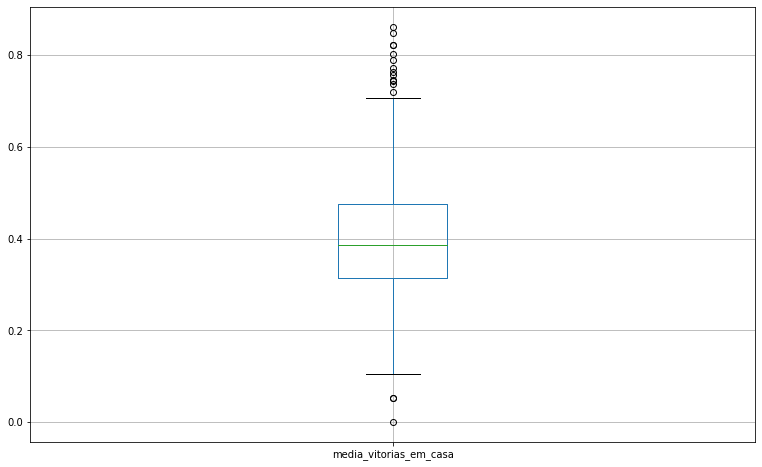

In [17]:
jogos_em_casa.boxplot(column='media_vitorias_em_casa')

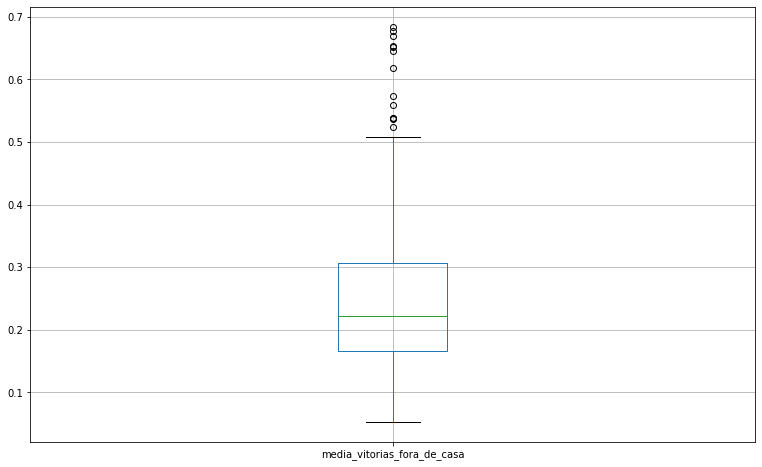

In [18]:
jogos_fora_de_casa.boxplot(column='media_vitorias_fora_de_casa')

Observando os boxplots, à princípio parece que as médias de vitórias em casa são maiores que as médias das vitórias fora de casa, o que verificaremos com o teste de hipótese a seguir 

<strong>Avaliação das variâncias das amostras:</strong>

<h4>TESTE LEVENE</h4>

In [19]:
Estat_Levene = stats.levene(jogos_em_casa['media_vitorias_em_casa'],jogos_fora_de_casa['media_vitorias_fora_de_casa'])
Estat_Levene

LeveneResult(statistic=5.928010140985623, pvalue=0.015197428610824855)

<strong>O teste Levene permite rejeitar a hipótese nula de que a variância das médias de vitórias em casa e fora de casa são iguais.</strong>

#### Teste de Wilcoxon Pareado

Não podemos usar o teste t pareado (`stats.ttest_rel`) pois não podemos assumir que as variâncias são iguais
por se tratar de amostras dependentes (são os mesmos times jogando em casa e fora de casa), aplicaremos o teste de Wilcoxon.

#### Formular a hipótese

- __H0: $\mu_1 <= \mu_2$, a média das vitórias em casa é igual ou menor do que a média das vitórias fora de casa__
- __H1: $\mu_1 > \mu_2$, a média das vitórias em casa é maior do que a média das vitórias fora de casa__

In [20]:
stats.wilcoxon(jogos_em_casa['media_vitorias_em_casa'],jogos_fora_de_casa['media_vitorias_fora_de_casa'], alternative = 'greater')

WilcoxonResult(statistic=40803.5, pvalue=1.1482083193610845e-45)

Com esse p-valor podemos rejeitar a hipótese nula, do teste unilateral, de que a média das vitórias em casa é menor ou igual à média das vitórias fora de casa com um nível de significância de 95%.

<p><strong>Portanto podemos concluir que jogar em casa traz vantagens em relação a jogar fora de casa.</strong></p>

---

<h1>Questão 3</h1><h4>Nessa questão você terá <strong>duas opções</strong> para escolher. A primeira será um <strong>dataset próprio</strong>, onde a base de dados fica a critério do próprio aluno. Essa opção serve para o aluno escolher um dataset na sua área de trabalho ou interesse. A segunda opção será utilizar uma base de dados de restaurantes de NY <strong>(ny_restaurant.csv)</strong>. Essa base tem o resultado de uma pesquisa de avaliação de 168 restaurantes na cidade de Nova Iorque e consiste de alguns atributos:</h4>
    <ol>
    <p><li>● <strong>Id:</strong> identificador do restaurante</li></p>
    <p><li>● <strong>Restaurant:</strong> nome do restaurante sendo avaliado</li></p>
    <p><li>● <strong>Price:</strong> Preço médio de um jantar no restaurante</li></p>
    <p><li>● <strong>Food:</strong> Nota média de 1 a 30 dos avaliadores para a qualidade da comida</li></p>
<p><li>● <strong>Decor:</strong> Nota média de 1 a 30 dos avaliadores para a decoração do restaurante</li></p>
    <p><li>● <strong>Service:</strong> Nota média de 1 a 30 dos avaliadores para o serviço do restaurante</li></p>
    <p><li>● <strong>Location:</strong> Variável categórica indicando a localização do restaurante</li></p></ol>
    <p></p>
    <p>Nessa questão, subdividida em itens, vamos <strong>criar modelos de regressão múltipla ou
regressão logística</strong>, dependendo do dataset escolhido.</p>
    <ol>
    <p><strong>a) Realizar uma análise descritiva dos dados plotando alguns gráficos e analisando algumas estatísticas básicas. (1 ponto)</strong></p>
        <ol><p>Com o método <strong>.describe().T</strong> podemos ver que o preço dos restaurantes é a variável com maior desvio padrão, <strong>9.2928</strong>, tendo seu valor mínimo de <strong>19.0</strong>, seu valor máximo de <strong>65.0</strong> e uma média de <strong>42.69</strong>.</p>
        <p>Através do <strong>mapa de calor</strong> podemos ver a intensidade da correlação entre variável dependente e as variáveis independentes.</p>
        <p>Através do <strong>gráfico de dispersão</strong> pode-se constatar linearidade entre as variáveis independentes (Service, Decor, Food) e a variável dependente (Preço) o que não ocorre com a variável Location por ser uma variável categórica.</p></ol>
    <p><strong>b) Construir um modelo utilizando todas as variáveis do dataset. Após o ajuste do modelo será necessário interpretar cada coeficiente no impacto da variável resposta, dizendo a relação com a variável resposta e se são significantes ou não. O modelo no geral é significante? Como podemos afirmar isso? Interprete o coeficiente de determinação ou o desvio (dependendo do modelo escolhido). Para o dataset de restaurantes, queremos <strong>prever o preço do jantar de acordo com as outras variáveis</strong>. (2 pontos)</strong></p>
        <ol><p> Após o ajuste do modelo foi feita a regressão OLS de onde podemos ver através do R-squared que 62,8% da variabilidade de minha variável dependente (no caso, o Preço de um restaurante desta base de dados) são explicadas pelo modelo. Com um coeficiente ajustado, Adj. R-Squared, muito próximo em 61,9%.</p>
        <p>A estatística F, F-Statistics, nos mostra que há pelo menos uma varíavel relevante para a predição do Preço dos restaurantes.</p>
        <p>O p-value e o gráfico de Regressão Parcial nos mostra que a variável irrelevante é a Service, com um p-value de 99,5%.</p></ol>
    <p><strong>c) Investigar se as premissas do modelo foram violadas. (1 ponto)</strong></p>
        <ol><p><strong>MODELO 1</strong></p>
        <p><strong>Premissa de Linearidade:</strong> o <strong>gráfico de dispersão</strong> confirma a linearidade entre as variáveis independentes <strong>Food, Decor e Service</strong>. A variável <strong>Location</strong> é categórica, logo, não considerei sua linearidade.</p>
        <p><strong>Premissa de Homocedasticidade:</strong> o <strong>gráfico dos Resíduos vs Ajustados</strong> confirma a Homocedasticidade das variáveis;</p>
        <p><strong>Premissa da Normalidade:</strong> a grande maioria dos valores no <strong>gráfico QQ</strong> garante a premissa de normalidade para o <strong>Modelo 1</strong>.</p>
        <p><strong>Premissa de Erros não autocorrelacionados:</strong> no <strong>gráfico Scale-Location</strong> pode-se auferir que não há tendência nos erros, garantindo, desta maneira, a premissa de Erros Não Autocorrelacionados.</p>
        <p><strong>Premissa da Não Endogeneidade:</strong> o gráfico dos <strong>Resíduos vs Ajustados</strong> mostra que não há correlação entre os Erros, garantindo, dessa forma, a premissa de <strong>Não Endogeneidade</strong>.</p>
        <p><strong>Premissa da Não Multicolinearidade:</strong> o <strong>Fator de Inflação da Variância</strong> não apresenta nenhum VIF maior do que 5 o que <strong>garante a premissa de Não Multicolinearidade</strong>.</p></ol>

Todos os cálculos que embasaram estas conclusões seguem a seguir:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphs 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

%matplotlib inline
from sklearn.preprocessing import scale

import scipy.stats as stats

In [22]:
plt.rcParams['figure.figsize']=[13,8]

In [23]:
df_restaurantes = pd.read_csv('ny_restaurantes.csv', header=0, sep=' ', index_col=0)

In [24]:
df_restaurantes.sample(10)

,Restaurant,Price,Food,Decor,Service,Location
15,Rossini's,47,20,18,21,East
3,Biricchino,34,21,13,18,West
78,Andiamo,33,18,17,18,East
156,Patsy's,42,20,16,19,West
31,La Gioconda,34,20,16,18,East
35,FELIDIA,62,25,22,23,East
52,East River Cafe,40,20,20,20,East
101,Joanna's,43,19,18,21,East
63,Grace's Trattoria,35,18,16,17,East
157,Gabriel's,50,22,19,21,West


In [25]:
df_restaurantes = pd.get_dummies(df_restaurantes, columns=["Location"])
print(df_restaurantes)

              Restaurant  Price  Food  Decor  Service  Location_East  \
1    Daniella Ristorante     43    22     18       20              0   
2     Tello's Ristorante     32    20     19       19              0   
3             Biricchino     34    21     13       18              0   
4                Bottino     41    20     20       17              0   
5             Da Umberto     54    24     19       21              0   
..                   ...    ...   ...    ...      ...            ...   
164                 Baci     31    17     15       16              0   
165              Puccini     26    20     16       17              0   
166           Bella Luna     31    18     16       17              0   
167              Métisse     38    22     17       21              0   
168              Gennaro     34    24     10       16              0   

     Location_West  
1                1  
2                1  
3                1  
4                1  
5                1  
..       

In [26]:
df_restaurantes = df_restaurantes.drop('Restaurant', axis = 1)
print(df_restaurantes)

     Price  Food  Decor  Service  Location_East  Location_West
1       43    22     18       20              0              1
2       32    20     19       19              0              1
3       34    21     13       18              0              1
4       41    20     20       17              0              1
5       54    24     19       21              0              1
..     ...   ...    ...      ...            ...            ...
164     31    17     15       16              0              1
165     26    20     16       17              0              1
166     31    18     16       17              0              1
167     38    22     17       21              0              1
168     34    24     10       16              0              1

[168 rows x 6 columns]


In [27]:
df_restaurantes = df_restaurantes.drop('Location_East', axis=1)
print(df_restaurantes)

     Price  Food  Decor  Service  Location_West
1       43    22     18       20              1
2       32    20     19       19              1
3       34    21     13       18              1
4       41    20     20       17              1
5       54    24     19       21              1
..     ...   ...    ...      ...            ...
164     31    17     15       16              1
165     26    20     16       17              1
166     31    18     16       17              1
167     38    22     17       21              1
168     34    24     10       16              1

[168 rows x 5 columns]


In [28]:
df_restaurantes = df_restaurantes.rename(columns={"Location_West":"Location"})
df_restaurantes

,Price,Food,Decor,Service,Location
1,43,22,18,20,1
2,32,20,19,19,1
3,34,21,13,18,1
4,41,20,20,17,1
5,54,24,19,21,1
...,...,...,...,...,...
164,31,17,15,16,1
165,26,20,16,17,1
166,31,18,16,17,1
167,38,22,17,21,1


In [29]:
df_restaurantes.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,168.0,42.696429,9.292814,19.0,36.0,43.0,50.0,65.0
Food,168.0,20.595238,1.982674,16.0,19.0,20.5,22.0,25.0
Decor,168.0,17.690476,2.702743,6.0,16.0,18.0,19.0,25.0
Service,168.0,19.398810,2.113940,14.0,18.0,20.0,21.0,24.0
Location,168.0,0.369048,0.483989,0.0,0.0,0.0,1.0,1.0


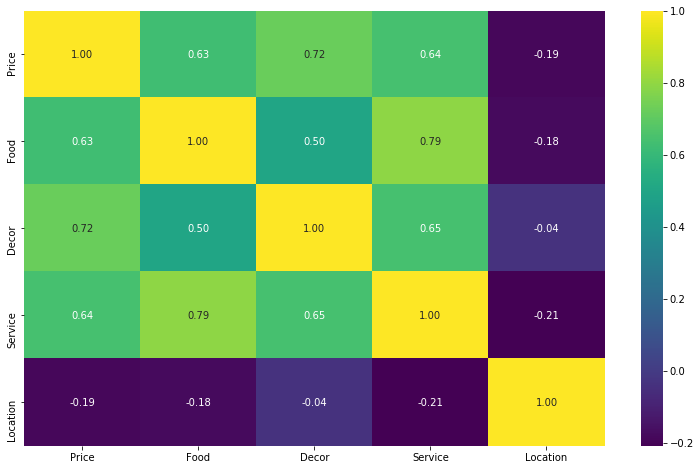

In [30]:
sns.heatmap(df_restaurantes.corr(), annot=True, cmap="viridis", fmt='0.2f');

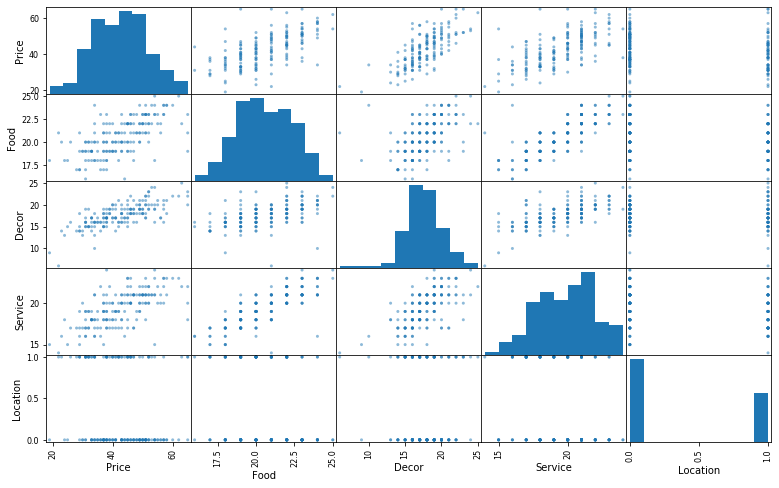

In [31]:
pd.plotting.scatter_matrix(df_restaurantes);

In [32]:
X1 = sm.add_constant(df_restaurantes.drop('Price', axis=1))
y1= df_restaurantes['Price']
X1.sample(10)

,const,Food,Decor,Service,Location
131,1.0,19,21,17,1
123,1.0,17,16,17,1
24,1.0,22,21,21,0
138,1.0,19,15,17,1
75,1.0,23,20,22,0
136,1.0,19,19,18,1
69,1.0,17,18,15,0
103,1.0,23,16,20,0
146,1.0,23,23,21,1
144,1.0,22,19,21,1


In [33]:
price_OLS_model = sm.OLS(y1, X1).fit()
print(price_OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           5.35e-34
Time:                        16:47:39   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9557      4.858     -4.520      0.0

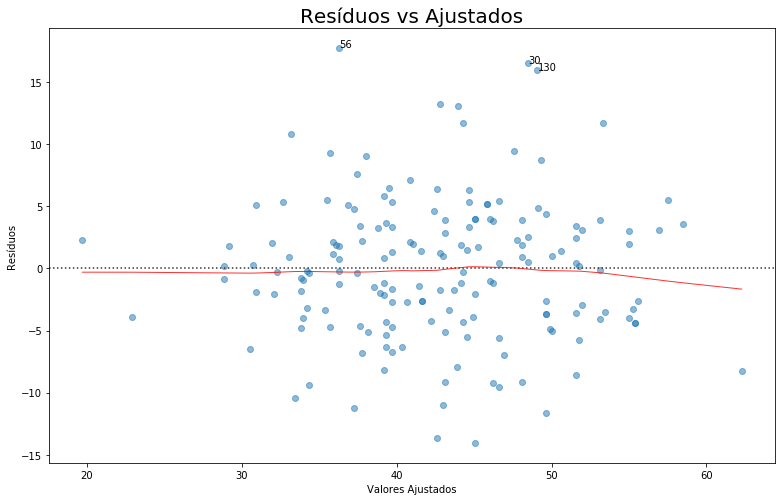

In [34]:
graph_plotter = graphs.AssumptionGraphs(price_OLS_model)
graph_plotter.plot_residual_fitted_values(y1)

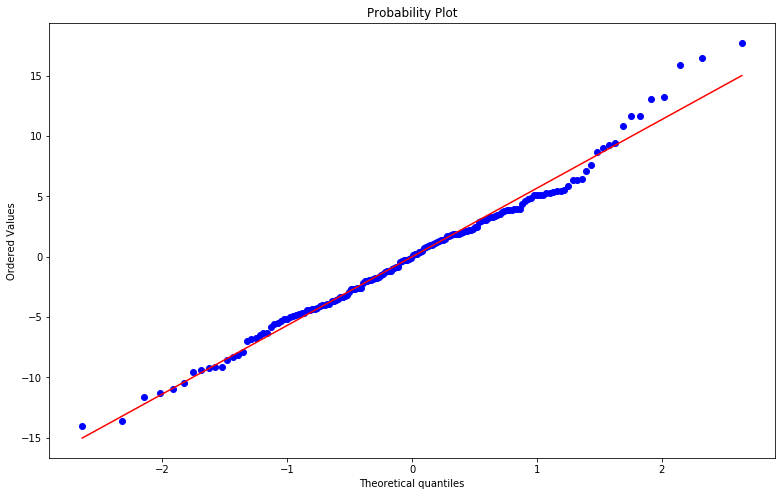

In [35]:
graph_plotter.plot_qq()

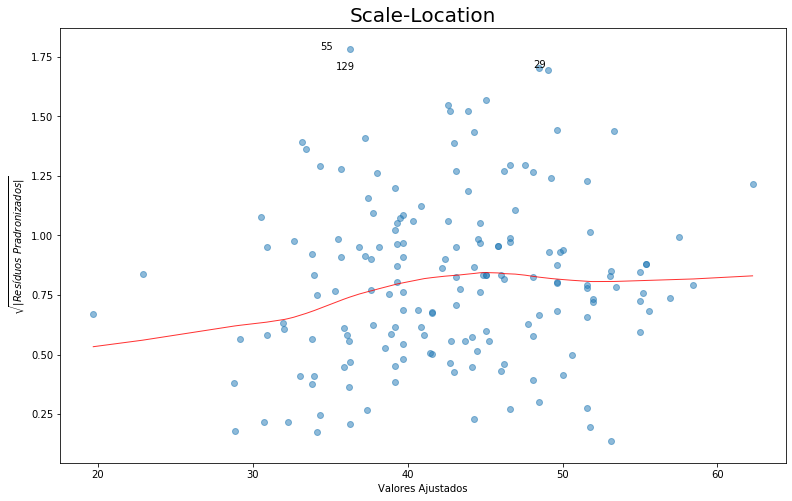

In [36]:
graph_plotter.plot_scale_location()

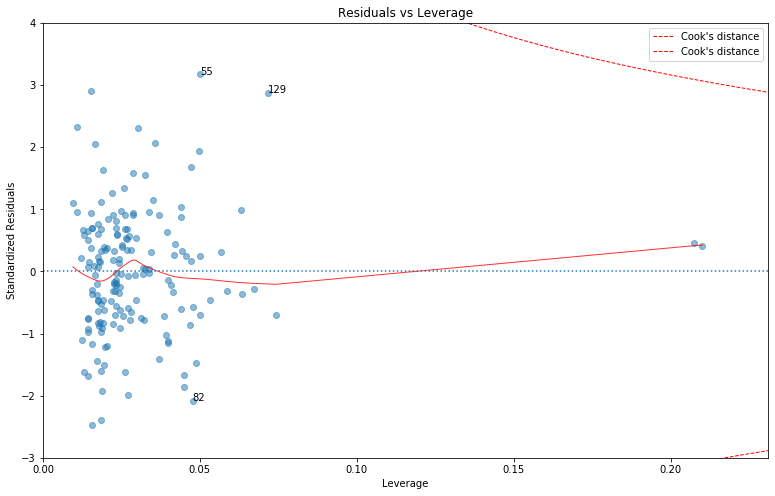

In [37]:
graph_plotter.plot_influence()

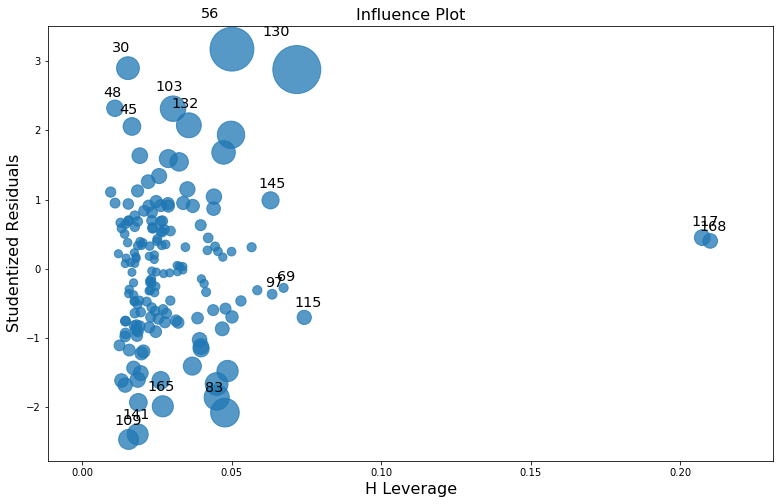

In [38]:
price_OLS_model.get_influence().plot_influence();

---

<strong>FATOR DE INFLAÇÃO DA VARIÂNCIA PRIMEIRO MODELO</strong>

In [39]:
X1
print(X1)

     const  Food  Decor  Service  Location
1      1.0    22     18       20         1
2      1.0    20     19       19         1
3      1.0    21     13       18         1
4      1.0    20     20       17         1
5      1.0    24     19       21         1
..     ...   ...    ...      ...       ...
164    1.0    17     15       16         1
165    1.0    20     16       17         1
166    1.0    18     16       17         1
167    1.0    22     17       21         1
168    1.0    24     10       16         1

[168 rows x 5 columns]


In [40]:
[variance_inflation_factor(X1.values, i)
 for i in range(X1.shape[1])]

[120.42414221281652,
 2.7142611661551976,
 1.7448510618335946,
 3.5587347597031536,
 1.064984645895069]

In [41]:
pd.Series([variance_inflation_factor(X1.values,i)
         for i in range(X1.shape[1])], index=X1.columns)

const       120.424142
Food          2.714261
Decor         1.744851
Service       3.558735
Location      1.064985
dtype: float64

---

<strong>Gráfico de Regressão Parcial ou de Variável Agregada PRIMEIRO MODELO</strong>

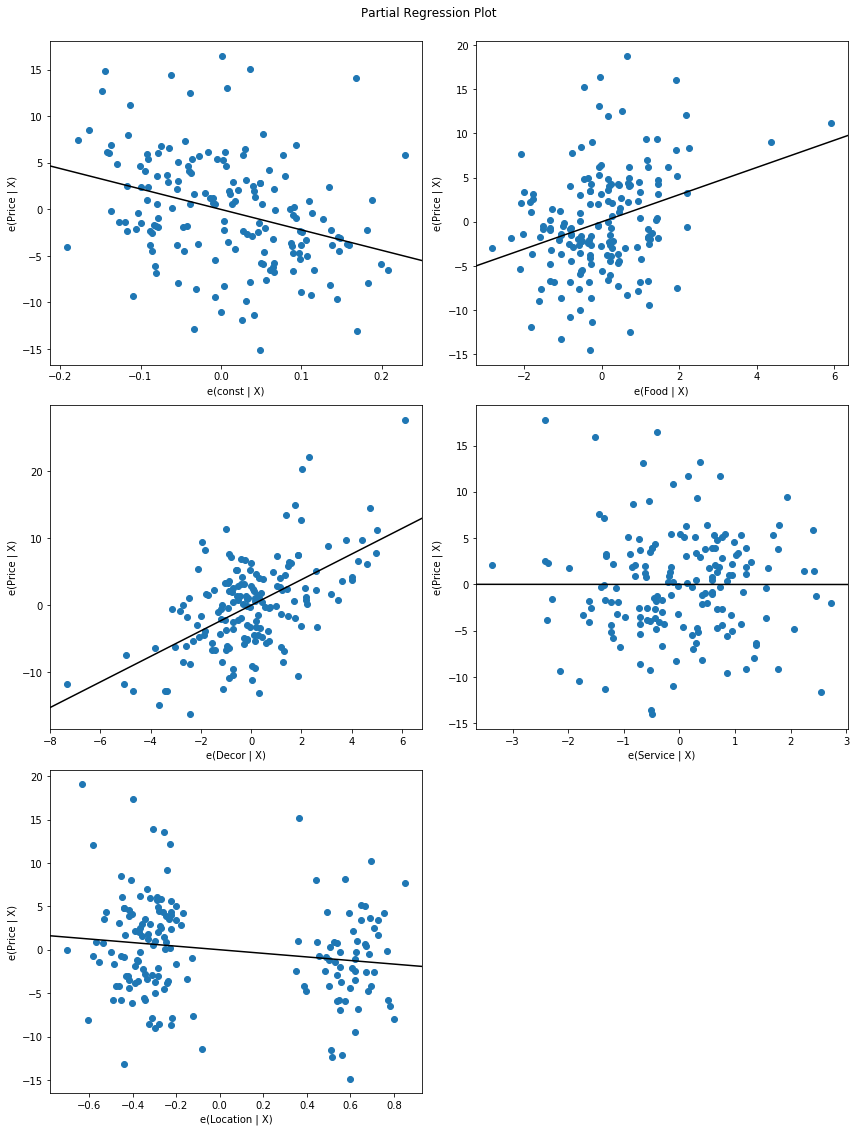

In [42]:
fig = plt.figure(figsize=(12,16))
sm.graphics.plot_partregress_grid(price_OLS_model, fig=fig);

---

<strong>SEGUNDO MODELO: retirei a variável Service devido ao seu elevado p-value e por conta de seu gráfico de Regressão Parcial mostrar que não impacta no modelo.</strong>

---

<ol><p><strong>d) Construir mais dois modelos diferentes do modelo saturado construído acima, justificando
a escolha das variáveis. Não deixe de analisar se as premissas estão sendo violadas. (2 pontos)</strong></p>
        <ol><p><strong>MODELO 2: Sem a Variável Service (retirada por apresentar alto p-value e não ser relevante para o modelo a partir do gráfico de Regressão Parcial)</strong></p>
        <p><strong>Premissa de Linearidade:</strong> o <strong>gráfico de dispersão</strong> confirma a linearidade entre as variáveis independentes <strong>Food e Decor</strong>. A variável <strong>Location</strong> é categórica, logo, não considerei sua linearidade.</p>
        <p><strong>Premissa de Homocedasticidade:</strong>o <strong> gráfico dos Resíduos vs Ajustados</strong> confirma a Homocedasticidade das variáveis;</p>
        <p><strong>Premissa da Normalidade:</strong> a grande maioria dos valores no <strong>gráfico QQ</strong> garante a premissa de normalidade para o <strong>Modelo 2</strong>.</p>
        <p><strong>Premissa de Erros não autocorrelacionados:</strong> no <strong>gráfico Scale-Location</strong> pode-se auferir que não há tendência nos erros, garantindo, dessa maneira, a premissa de Erros Não Autocorrelacionados.</p>
        <p><strong>Premissa da Não Endogeneidade:</strong> o gráfico dos <strong>Resíduos vs Ajustados</strong> mostra que não há correlação entre os Erros, garantindo, dessa forma, a premissa de <strong>Não Endogeneidade</strong>.</p>
        <p><strong>Premissa da Não Multicolinearidade:</strong> o <strong>Fator de Inflação da Variância</strong> não apresenta nenhum VIF maior do que 5 o que <strong>garante a premissa de Não Multicolinearidade</strong>.</p></ol></ol>

In [43]:
X2 = sm.add_constant(df_restaurantes.drop(['Price','Service'], axis=1))
y2= df_restaurantes['Price']
X2.sample(10)

,const,Food,Decor,Location
28,1.0,20,16,0
8,1.0,20,18,0
45,1.0,22,17,0
110,1.0,23,19,0
161,1.0,21,19,1
24,1.0,22,21,0
103,1.0,23,16,0
86,1.0,19,15,0
52,1.0,20,20,0
105,1.0,24,21,0


In [44]:
price_OLS_model2 = sm.OLS(y2, X2).fit()
print(price_OLS_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           5.10e-35
Time:                        16:47:46   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9599      4.806     -4.569      0.0

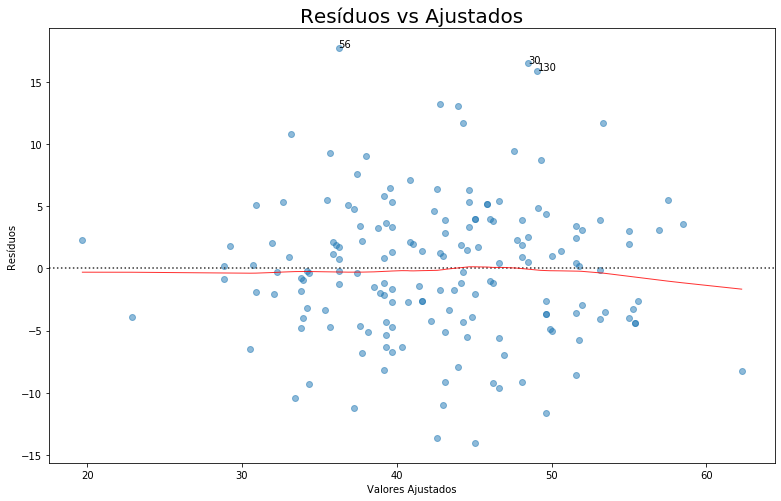

In [45]:
graph_plotter = graphs.AssumptionGraphs(price_OLS_model2)
graph_plotter.plot_residual_fitted_values(y2)

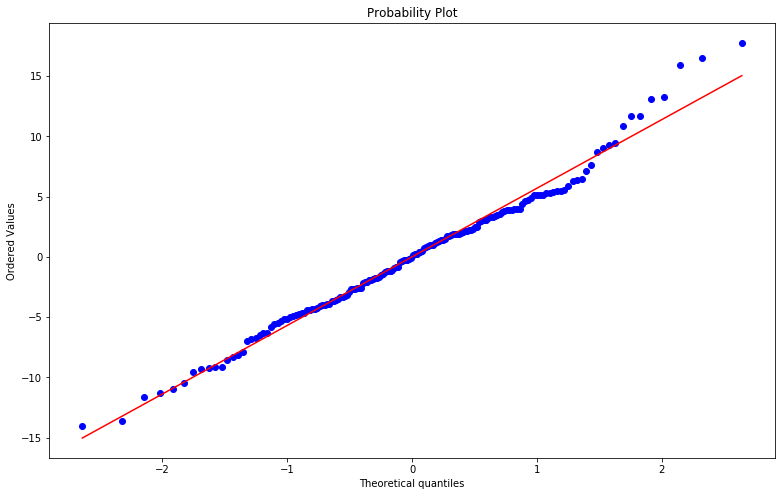

In [46]:
graph_plotter.plot_qq()

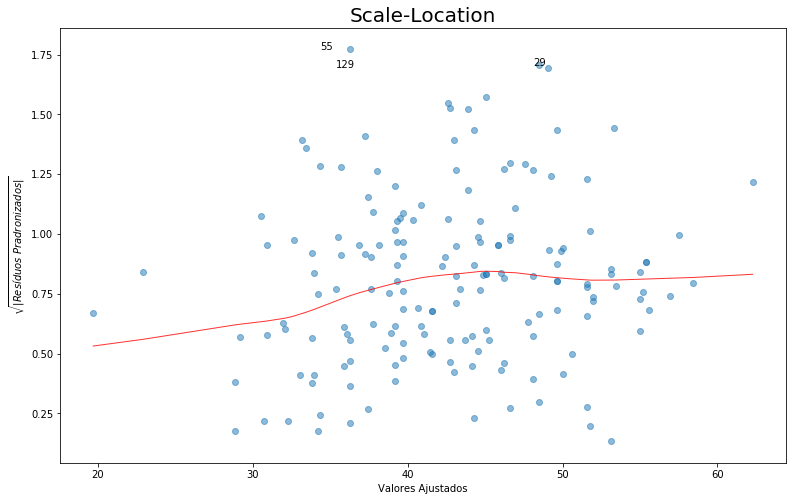

In [47]:
graph_plotter.plot_scale_location()

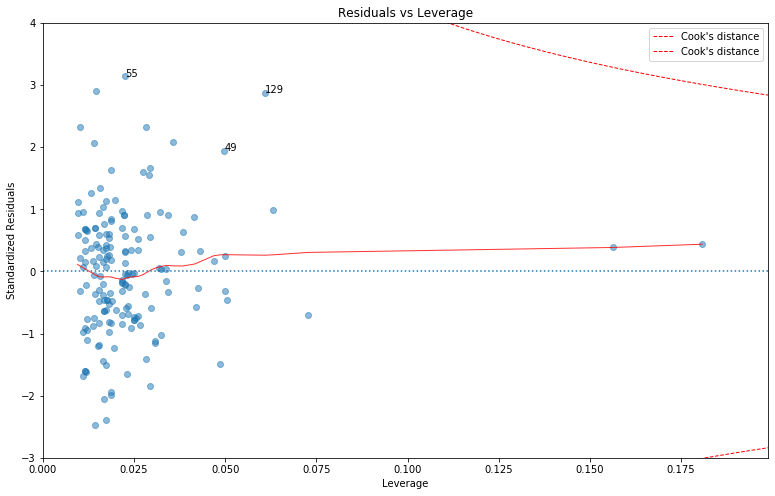

In [48]:
graph_plotter.plot_influence()

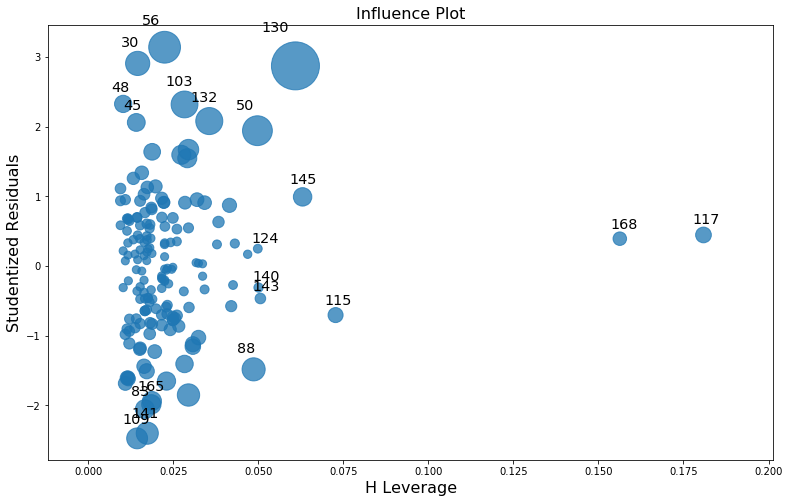

In [49]:
price_OLS_model2.get_influence().plot_influence();

---

<strong>FATOR DE INFLAÇÃO DA VARIÂNCIA SEGUNDO MODELO</strong>

In [50]:
[variance_inflation_factor(X2.values, i)
 for i in range(X2.shape[1])]

[118.59850012578951, 1.3895153719617195, 1.346029737348304, 1.0380003199678123]

In [51]:
pd.Series([variance_inflation_factor(X2.values,i)
         for i in range(X2.shape[1])], index=X2.columns)

const       118.598500
Food          1.389515
Decor         1.346030
Location      1.038000
dtype: float64

---

<strong>Gráfico de Regressão Parcial ou de Variável Agregada SEGUNDO MODELO</strong>

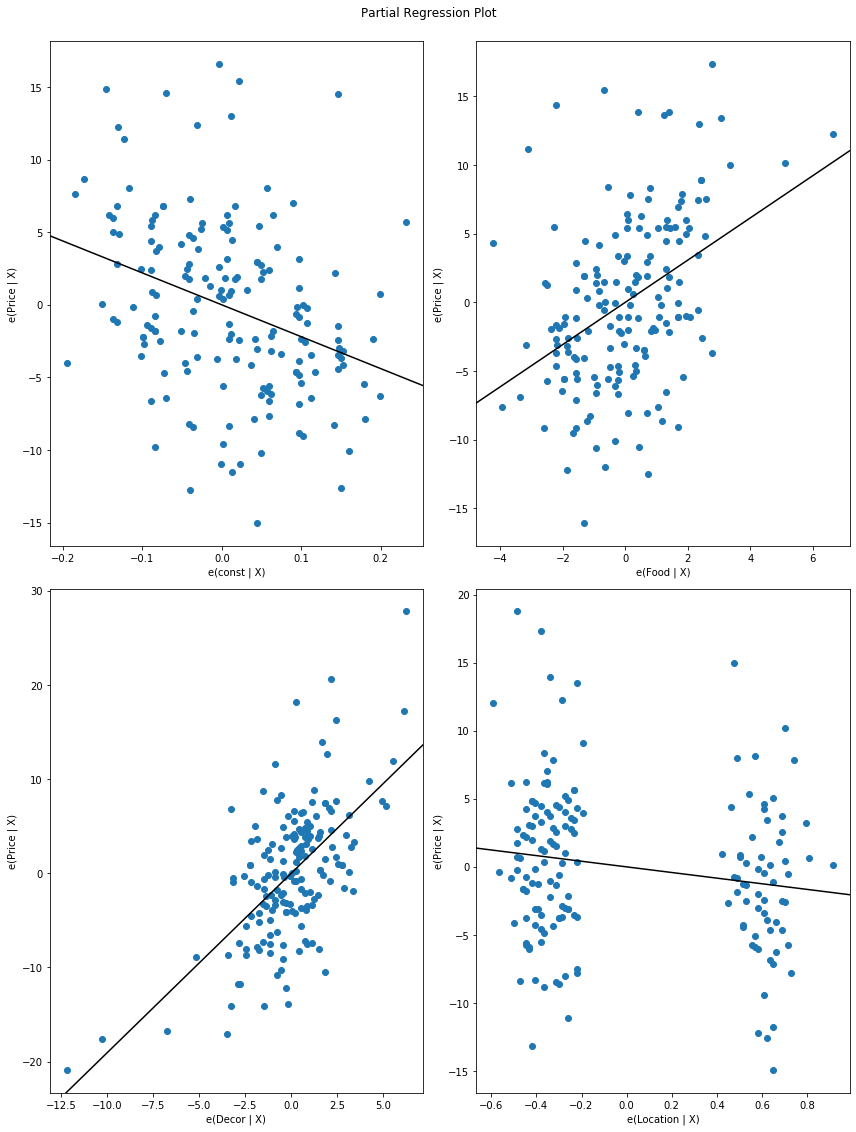

In [52]:
fig = plt.figure(figsize=(12,16))
sm.graphics.plot_partregress_grid(price_OLS_model2, fig=fig);

---

<strong>TERCEIRO MODELO retirando as variáveis Service e Location_West</strong>

---

<ol><ol><p><strong>MODELO 3: Sem as Variáveis Service e Location (retirada por ser categórica apenas para estudo)</strong></p>
        <p><strong>Premissa de Linearidade:</strong> o <strong>gráfico de dispersão</strong> confirma a linearidade entre as variáveis independentes <strong>Food e Decor</strong>, garantindo, assim, a  premissa de linearidade.</p>
        <p><strong>Premissa de Homocedasticidade:</strong> o <strong>gráfico dos Resíduos vs Ajustados</strong> confirma a Homocedasticidade das variáveis;</p>
        <p><strong>Premissa da Normalidade:</strong> a grande maioria dos valores no <strong>gráfico QQ</strong> garante a premissa de normalidade para o <strong>Modelo 3</strong>.</p>
        <p><strong>Premissa de Erros não autocorrelacionados:</strong> no <strong>gráfico Scale-Location</strong> pode-se auferir que não há tendência nos erros, garantindo, dessa maneira, a premissa de Erros Não Autocorrelacionados.</p>
        <p><strong>Premissa da Não Endogeneidade:</strong> o gráfico dos <strong>Resíduos vs Ajustados</strong> mostra que não há correlação entre os Erros, garantindo, dessa forma, a premissa de <strong>Não Endogeneidade</strong>.</p>
        <p><strong>Premissa da Não Multicolinearidade:</strong> o <strong>Fator de Inflação da Variância</strong> não apresenta nenhum VIF maior do que 5 o que <strong>garante a premissa de Não Multicolinearidade</strong>.</p></ol></ol>

In [53]:
X3 = sm.add_constant(df_restaurantes.drop(['Price','Service','Location'], axis=1))
y3 = df_restaurantes['Price']
X3.sample(10)

,const,Food,Decor
135,1.0,20,19
26,1.0,19,17
154,1.0,20,18
75,1.0,23,20
168,1.0,24,10
53,1.0,19,18
71,1.0,22,18
104,1.0,18,15
152,1.0,23,19
28,1.0,20,16


In [54]:
price_OLS_model3 = sm.OLS(y3, X3).fit()
print(price_OLS_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           4.37e-35
Time:                        16:47:52   Log-Likelihood:                -531.84
No. Observations:                 168   AIC:                             1070.
Df Residuals:                     165   BIC:                             1079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5002      4.723     -5.187      0.0

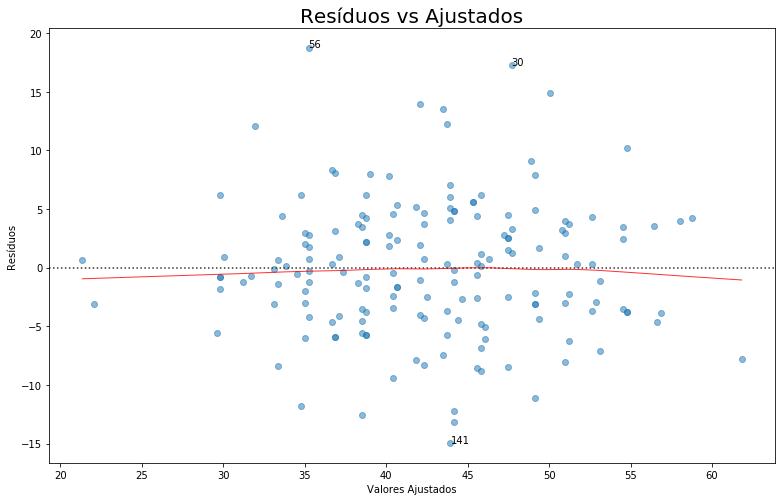

In [55]:
graph_plotter = graphs.AssumptionGraphs(price_OLS_model3)
graph_plotter.plot_residual_fitted_values(y3)

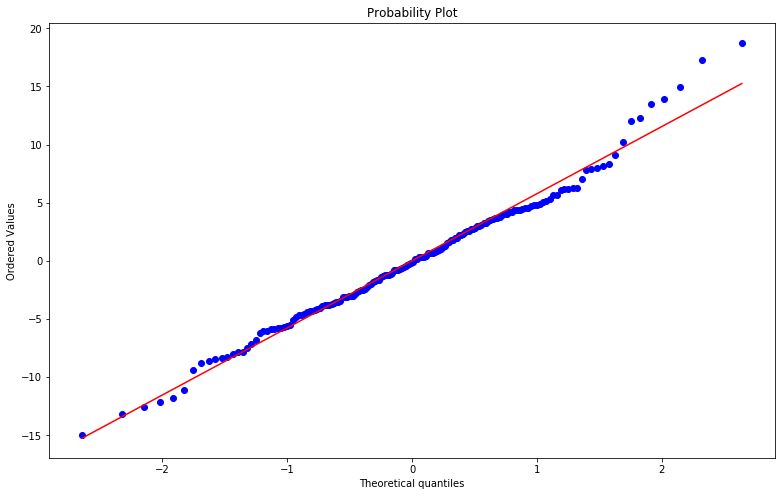

In [56]:
graph_plotter.plot_qq()

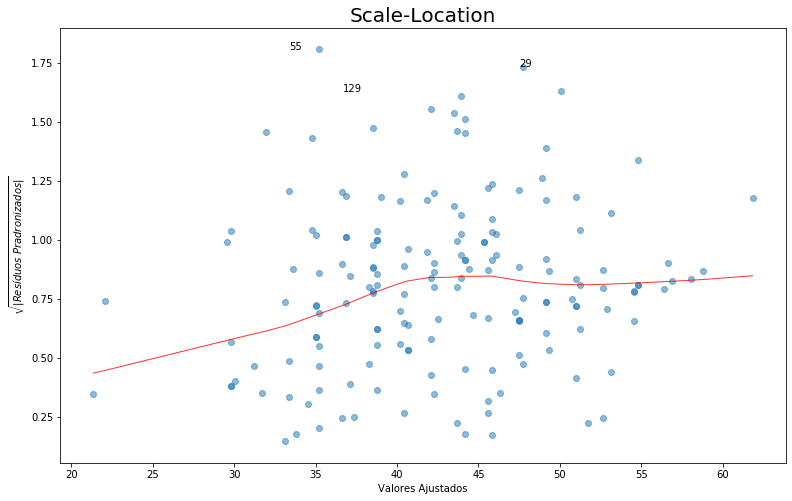

In [57]:
graph_plotter.plot_scale_location()

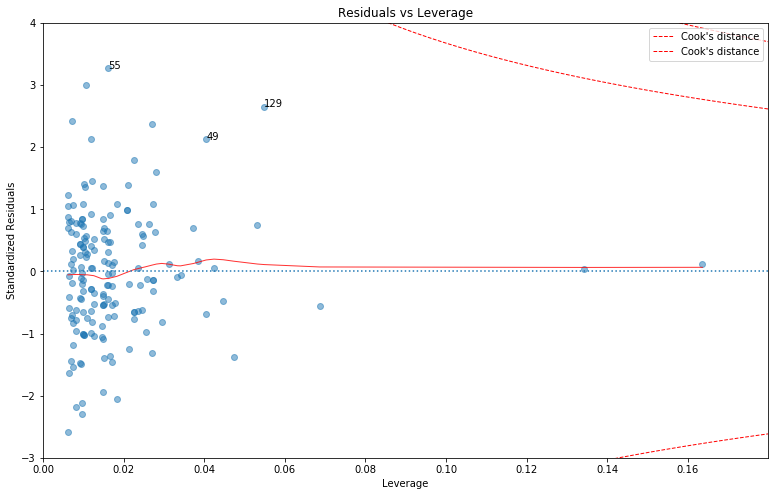

In [58]:
graph_plotter.plot_influence()

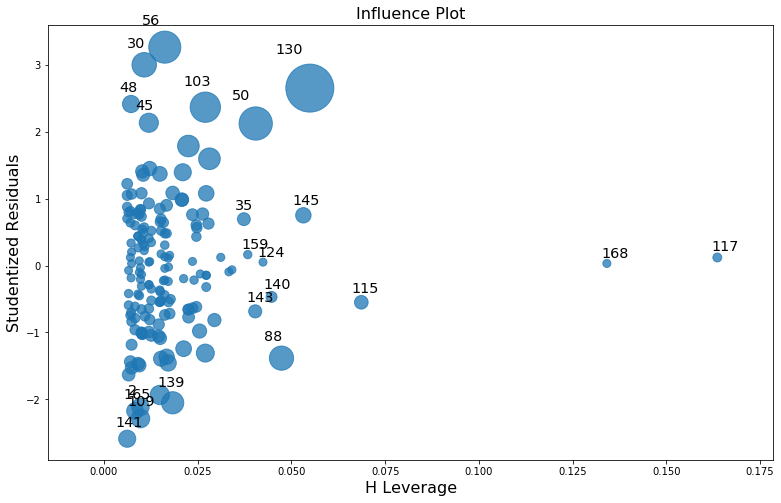

In [59]:
price_OLS_model3.get_influence().plot_influence();

---

<strong>FATOR DE INFLAÇÃO DA VARIÂNCIA TERCEIRO MODELO</strong>

In [60]:
[variance_inflation_factor(X3.values, i)
 for i in range(X3.shape[1])]

[111.86565807141845, 1.3403593764241586, 1.340359376424159]

In [61]:
pd.Series([variance_inflation_factor(X3.values,i)
         for i in range(X3.shape[1])], index=X3.columns)

const    111.865658
Food       1.340359
Decor      1.340359
dtype: float64

---

<strong>Gráfico de Regressão Parcial ou de Variável Agregada TERCEIRO MODELO</strong>

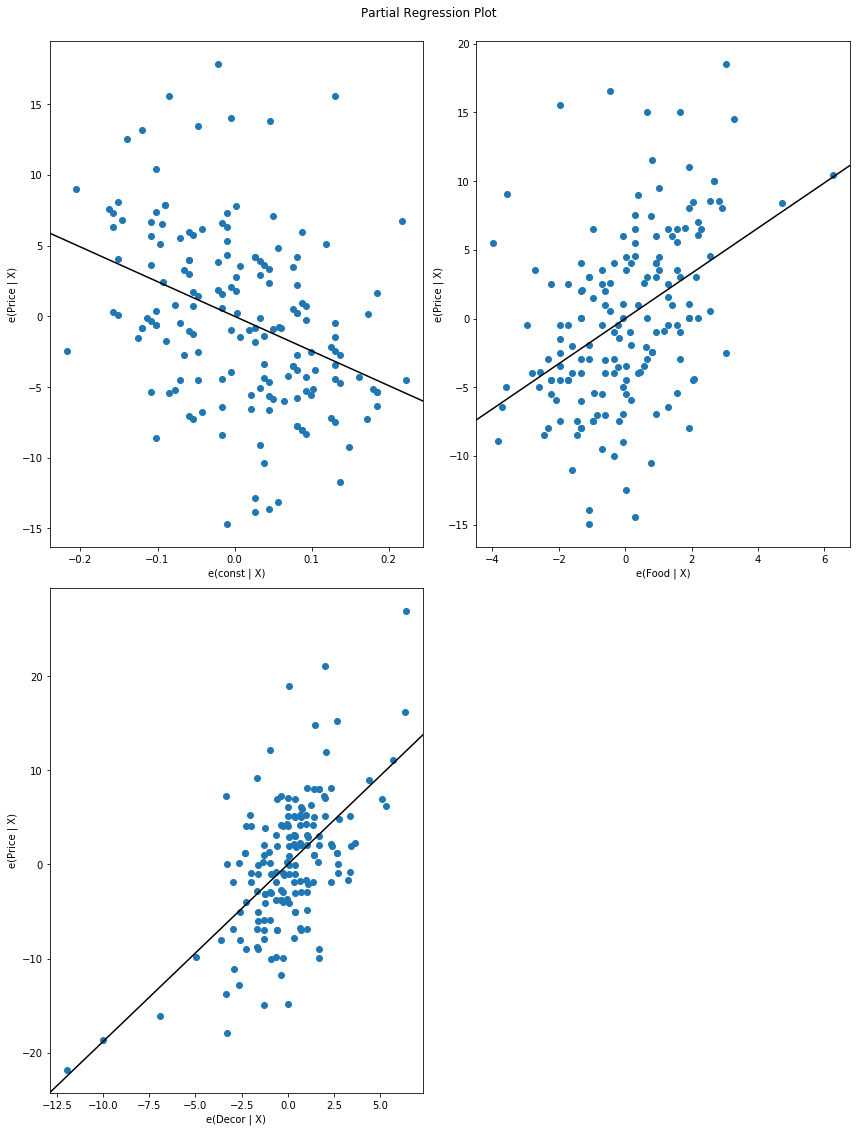

In [62]:
fig = plt.figure(figsize=(12,16))
sm.graphics.plot_partregress_grid(price_OLS_model3, fig=fig);

<ol><p><strong>e) Qual o melhor modelo? Comparar os modelos construídos com pelo menos três métricas, justificando a escolha do melhor modelo. (1 ponto)</strong></p>
    <ol>
    <p><strong>O Primeiro Modelo mostrou que a Variável Service não serve para a predição do Preço dos Restaurantes, tanto pelo seu alto p-value (.995) quanto pelo gráfico de Regressão Parcial.</strong></p>
    <p><strong>O Segundo Modelo apresenta os melhores valores de R2 (.628) e R2 Ajustado (.621) [quanto mais alto, mais a variável dependete é explicada pelo modelo]; um F (92.24) maior que o primeiro modelo o que nos mostra que pelo menos uma das variáveis explicam o Preço do restaurante; um P(F-statistic = 5.10e-35) menor que os demais e um AIC (1067).</strong></p>
    <p><strong>O p-value das variáveis é zero. Garantindo o nível de significância do modelo.</strong></p>
    <p><strong>Já o Terceiro Modelo, apresenta um R2 menor (.617) e R2 Ajustado (.612).</strong></p>
    <p><strong>Como nosso objetivo principal da Regressão é a predição, podemos ver que o AIC do modelo 2 apresentou um valor menor que do Modelo 3 que foi de AIC (1070). Por ter um menor valor de AIC, o Modelo 2 nos garante uma melhor acurácia.</strong></p>
    <p><strong>Portando, o Segundo Modelo é o melhor modelo nesse estudo.</strong></p>
    </ol>
</ol>
